In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# %matplotlib notebook to make visualization interactive

## Matplotlib API Primer

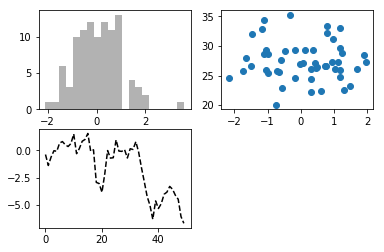

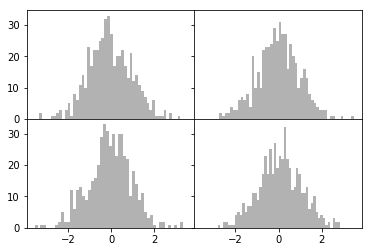

In [27]:
## Before plotting, need to create a Figure object which will hold one (or more) subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

## If don't specify AxesSubplot object (ax1 to ax3), plt.plot() will use the last figure / subplot used 
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = .3)
ax2.scatter(np.random.randn(50), np.random.randn(50) * 3 + 27)

## Adjusting spacing around subplots and using plt.subplot as a convenience method to building a figure + subplots
fig, axes = plt.subplots(2,2, sharex=True, sharey = True) # fig: figure, axes: axesubplot objects, same as ax1 to ax3 
for i in range(2): 
    for j in range(2): 
        axes[i,j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = .3)
plt.subplots_adjust(wspace = 0, hspace = 0)




## Color, Markers and style 

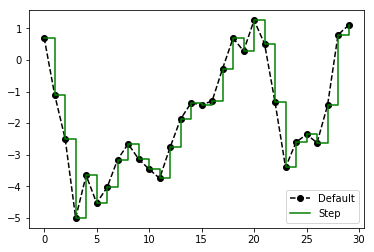

In [43]:
## Can munge all style in one string (ax.plot(x, y, 'g--') is a green dashed line for example) 
## Prefer to keep it separate 

ax = plt.subplot() ## Instead of doing fig = plt.figure(); ax = fig.add_subplot(1,1,1) (or maybe fig.add_subplot())
ax.plot(np.arange(30), np.random.randn(30), 'g--') 
plt.close()

## Three different linetypes: 
ax1 = plt.subplot()
data = np.random.randn(30).cumsum()
ax1.plot(data, color = 'k', linestyle = 'dashed', marker = 'o',
        label = 'Default') ## alternatively 'ko--'
ax1.plot(data, color = 'g', drawstyle = 'steps-post', label = 'Step')
plt.legend(loc = 'best')






## Ticks, Labels, Legends 

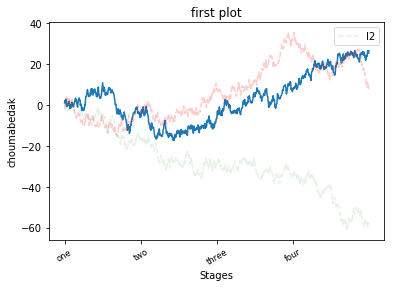

In [61]:
## Ticks and labels 
## pyplot interface is meant for interactive used and can be used it two ways: 
## Take example of xlim - if 1) give argument, then setting xlim, otherwise 2) returning xlim 
## @note: prefer to use the subplot instance methods - <subplot>.set_xlim or <subplot>.get_xlim

ax = plt.subplot()
ax.plot(np.random.randn(1000).cumsum())
ax.set_xticks([0,250,500,750]) # Will set numerical vals
ax.set_xticklabels(['one','two','three','four'], fontsize = 'small', rotation = 30)

# plt has a set() convenience method where can pass different properties
props = {
    'title': 'first plot',
    'xlabel': 'Stages',
    'ylabel': 'choumabedak'
}
ax.set(**props) # @reminder: ** unpacks argument list. 

## Adding legend, just add label when adding each piece of plot 
ax.plot(np.random.randn(1000).cumsum(), linestyle = 'dashed', alpha = .1, color = 'green', label = 'l2')
# label = '_nolegend_' or don't pass label argument to not add to legend
ax.plot(np.random.randn(1000).cumsum(), linestyle = 'dashed', alpha = .2, color = 'red', label = '_nolegend_') 
ax.legend()





## Example plots with pandas / seaborn 

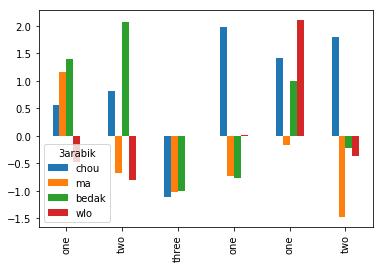

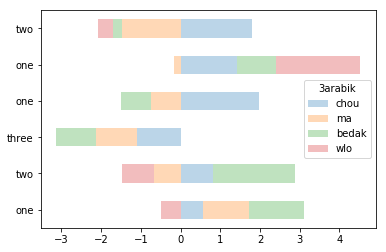

In [78]:
## Pandas 

## Barplots 
df = pd.DataFrame(np.random.randn(6,4), 
                 index = ['one', 'two', 'three', 'one', 'one', 'two'],
                 columns = pd.Index(['chou', 'ma', 'bedak', 'wlo'], name = '3arabik')) # @note: use pd.Index to give name

# fig, axes = plt.subplots(2,1)
df.plot.bar() # @note the column index name is in legend 
df.plot.barh(stacked = True, alpha = .3) 



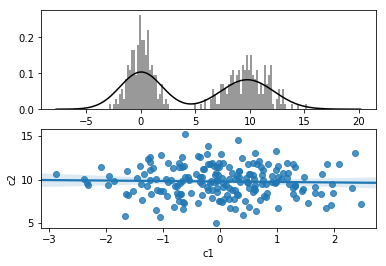

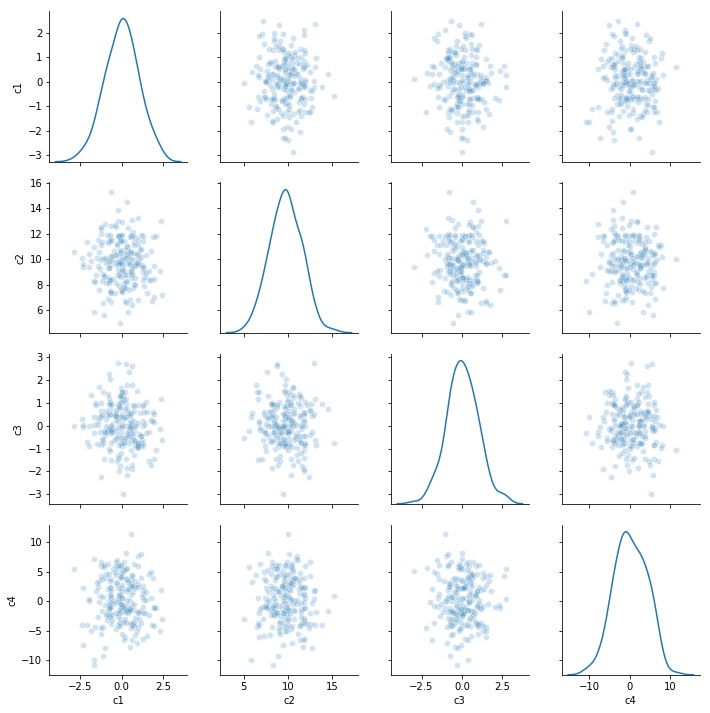

In [102]:
## Seasborn 
comp1 = np.random.normal(0, 1, size = 200)
comp2 = np.random.normal(10, 2, size = 200)

values = pd.Series(np.concatenate([comp1, comp2]))

## Hist / Density plots
# sns.barplot(values)
fig, ax = plt.subplots(2,1)

sns.distplot(values, bins = 100, color = 'k', ax=ax[0])

## Scatters 
data = pd.DataFrame({"c1": comp1, "c2":comp2})
sns.regplot('c1', 'c2', data = data, ax = ax[1])

data = pd.DataFrame({"c1": comp1, "c2":comp2, 
                    "c3": np.random.randn(200), "c4": np.random.randn(200) * 4})

sns.pairplot(data, diag_kind='kde', plot_kws={"alpha":.2})

